In [17]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from tqdm import tqdm

# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

%matplotlib inline
import IPython.display as display
import asyncio
import nest_asyncio
nest_asyncio.apply()

In [18]:
class configuration:
    def __init__(self):
        self.cls = -1
        
    @property
    def cls(self):
        return self.cls
    @cls.setter
    def cls(self, newcls):
        self.cls = newcls
        if cls in [0,1]:
            img_path = os.path.join(self.output_folder, f'{self.img_name}-{self.i}_{self.cls}.png')
            cv2.imwrite(self.img_path,self.arr)
        if cls == 2:
            small_arrs = np.array_split(img, img.shape[1]//5, axis=1)
            
            for j, small_arr in enumerate(small_arrs):
                cls = -1
                cv2.imshow("small_img",small_arr)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                while int(cls) not in [0,1,2]:
                    display.display(buttons_classification, clear=True)
                    time.sleep(2)
                img_path = os.path.join(output_folder,f'{img_name}-{i}-{j}_{cls}.png')
                cv2.imwrite(output_folder,small_arr)
    

In [ ]:
cfg = configuration()

In [ ]:
cfg.cls = -1

In [ ]:
class_dict = {'lug':1, 'wood':0, 'ambiguous':2}
skip_enum = {'proceed':1, 'skip':2}
cls = -1
cnt = -1
output = widgets.Output()

@output.capture(clear_output=False,wait=True) # based on https://github.com/jupyter-widgets/ipywidgets/issues/1846 and https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html
def classification(b):
    global cls 
    cls = class_dict[b.description]

def skip_fn(b):
    cnt = skip_enum[b.description]

In [ ]:
def wait_for_change(button1, button2, button3): #<------ Rename to widget1, and add widget2
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.description)
        button1.on_click(getvalue, remove=True) #<------ Rename to widget1
        button2.on_click(getvalue, remove=True) #<------ New widget2
        button3.on_click(getvalue, remove=True) #<------ New widget2

        # we need to free up the binding to getvalue to avoid an IvalidState error
        # buttons don't support unobserve
        # so use `remove=True` 
    button1.on_click(getvalue) #<------ Rename to widget1
    button2.on_click(getvalue) #<------ New widget2
    button3.on_click(getvalue)
    return future

In [24]:
button_lug = widgets.Button(description='lug', cls=1)
button_wood = widgets.Button(description = "wood",cls=2)
button_ambiguious = widgets.Button(description = "ambiguous", cls=3)

buttons_classification = widgets.HBox([button_lug, button_wood, button_ambiguious])

button_continue = widgets.Button(description ="proceed") 
button_skip = widgets.Button(description="skip")

buttons_first = widgets.HBox([button_continue, button_skip])

button_lug.on_click(classification)
button_ambiguious.on_click(classification)
button_wood.on_click(classification)

button_skip.on_click(skip_fn)
button_continue.on_click(skip_fn)

display.display(buttons_classification)
print(cls)


-1


In [12]:
img_path = "../data/img_0.png"
img = cv2.imread(img_path)


In [7]:

arrs = np.array_split(img, img.shape[1]//5, axis=1)


In [8]:
arrs[-1].shape

(536, 5, 3)

In [9]:
for arr in arrs:
    cv2.imshow("aaa",arr)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

KeyboardInterrupt: 

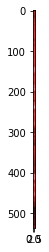

In [10]:

plt.imshow(arrs[-1])


In [6]:
import os
import time
def annotate_img(img, img_name, output_folder):
    arrs = np.array_split(img, img.shape[1]//50, axis=1)
    global cls
    cls = -1
    print(cls)
    for i, arr in enumerate(arrs):
        cv2.imshow("big_chunkimg",arr)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        x = str(input("is lug: 1 not:0 ambigous hit enter"))
        
            
        if int(x) in [0,1]:
            img_path = os.path.join(output_folder, f'{img_name}-{i}_{x}.png')
            cv2.imwrite(img_path,arr)
            
        else:
            small_arrs = np.array_split(img, img.shape[1]//5, axis=1)
            for j, small_arr in enumerate(small_arrs):
                cv2.imshow("small_img",small_arr)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
                x = str(input("is lug: 1 not:0 ambigous hit enter"))

                while int(cls) not in [0,1,2]:
                    display.display(buttons_classification, clear=True)
                    time.sleep(2)
                img_path = os.path.join(output_folder,f'{img_name}-{i}-{j}_{x}.png')
                cv2.imwrite(output_folder,small_arr)

In [13]:
annotate_img(img, img_path.split('/')[-1].split('.')[0], "../data/test")

-1
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter1
is lug: 1 not:0 ambigous hit enter1
is lug: 1 not:0 ambigous hit enter1


In [20]:
def choose_images(img_paths, outpout_folder):
    
    for i in tqdm(range(len(img_paths))):
        cnt = -1
        path = img_paths[i]
        arr = cv2.imread(path)
        cv2.imshow("img",arr)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        x = str(input("enter a char to proceed to annotating the img"))
        
        if x:
            img_name = img_path.split('/')[-1].split('.')[0]
            annotate_img(img=arr, img_name=img_name, output_folder=output_folder)
        display.clear_output(wait=True)

In [ ]:
folder_path = "../data/raw/camA_Monochrome/"
output_folder = "../data/annotated/cam_A_mono/"

img_paths = glob(f'{folder_path}/*.png')
choose_images(img_paths, output_folder)

  0%|                                                  | 0/500 [00:00<?, ?it/s]

enter a char to proceed to annotating the img4
-1
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0
is lug: 1 not:0 ambigous hit enter0


In [353]:
import numpy as np
import cv2
import os

def divide_image(img, new_width, img_name, folder):
    small_arrs = np.array_split(img, img.shape[1]//new_width, axis=1)

    
    for i, ar in enumerate(small_arrs[2:]):
        if ar.shape[-2] != new_width:
            continue
        im_p = os.path.join(folder, img_name+f'_{i}.png')
        cv2.imwrite(im_p, ar)

In [355]:
# from pathlib import Path

# folder_path = "../data/annotated/B_lug/"
# output_folder = Path("../data/annotated/B/1/")

# img_paths = glob(f'{folder_path}/*.png')

# for i in tqdm(range(len(img_paths))):
#     p = img_paths[i]
#     name =  p.split('\\')[-1].split('.')[0]
#     img = cv2.imread(p)
#     divide_image(img, 5, name, output_folder)
    



  0%|                                                  | 0/452 [00:00<?, ?it/s]

  1%|▎                                         | 4/452 [00:00<00:13, 33.47it/s]

  2%|▋                                         | 8/452 [00:00<00:14, 31.68it/s]

  3%|█                                        | 12/452 [00:00<00:13, 31.71it/s]

  4%|█▍                                       | 16/452 [00:00<00:14, 31.09it/s]

  4%|█▊                                       | 20/452 [00:00<00:13, 31.06it/s]

  5%|██▏                                      | 24/452 [00:00<00:14, 30.09it/s]

  6%|██▌                                      | 28/452 [00:00<00:14, 29.86it/s]

  7%|██▊                                      | 31/452 [00:01<00:14, 29.59it/s]

  8%|███                                      | 34/452 [00:01<00:14, 28.85it/s]

  8%|███▎                                     | 37/452 [00:01<00:14, 28.77it/s]

  9%|███▋                                     | 40/452 [00:01<00:14, 28.79it/s]

 10%|███▉                 

In [8]:
from pytorch_lightning import LightningModule, Trainer, seed_everything, LightningDataModule
from torch import nn
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.progress import TQDMProgressBar
from pytorch_lightning.loggers import CSVLogger, TensorBoardLogger
import torchmetrics
import torch
class Classifier(LightningModule):
    
    def __init__(self, numChannels = 1, classes = 1):
        super().__init__()
#         self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=4,
#         kernel_size=(5, 5))
#         self.relu1 = nn.ReLU()
#         self.pool1 = nn.MaxPool2d((8, 1), stride=(8, 1))
#         self.conv2 = nn.Conv2d(in_channels=4, out_channels=8,kernel_size=(1, 1))
#         self.relu2 = nn.ReLU()
#         # initialize first (and only) set of FC => RELU layers
#         self.fc1 = nn.Linear(in_features=128, out_features=64)
#         self.relu3 = nn.ReLU()
#         self.pool2 = nn.MaxPool2d((4, 1), stride=(4, 1))

        self.model = nn.Sequential(
            #nn.Conv2d(kernel_size= (5,5), in_channels=1,out_channels=1),
            nn.Linear(in_features=2680, out_features=32),
            nn.ReLU(),
#             nn.Linear(in_features=256, out_features= 64),
#             nn.ReLU(),
            nn.Linear(in_features=32, out_features=8),
            nn.ReLU(),
            nn.Linear(in_features=8, out_features=1),
            nn.Sigmoid()
        )

        # initialize our softmax classifier
#         self.fc2 = nn.Linear(in_features=32, out_features=1)
        
        self.train_acc = torchmetrics.Accuracy(task='binary')
        self.val_acc = torchmetrics.Accuracy(task='binary')
        self.test_acc = torchmetrics.Accuracy(task='binary')
        
    def configure_optimizers(self, learning_rate=1e-4):
        optimizer = torch.optim.Adam(self.parameters(), lr=learning_rate)
        return optimizer
        
    def forward(self,x):
#         x = self.pool1(self.relu1(self.conv1(x)))
#         x = self.pool2(self.relu2(self.conv2(x)))
#         #x = torch.flatten(x,1)
#         x = torch.sigmoid(self.fc1(x))
        x = torch.flatten(x, start_dim=2)
        
        x = self.model(x)
        return x
    
    def training_step(self, batch, batch_idx):
        X, y = batch
        y = y.to(torch.float)
        prediction = torch.flatten(self.forward(X)).to(torch.float)
        loss = nn.BCELoss(reduction='none')(prediction, y)
        self.log('train_loss', loss.mean())
        
        self.train_acc(prediction, y)
        self.log('train_acc', self.train_acc, on_step=True, on_epoch=False)
        return loss.mean()
    
    
    def test_step(self, batch, batch_idx):
        X, y = batch
        y = y.to(torch.float)
        prediction = torch.flatten(self.forward(X)).to(torch.float)
        loss = nn.BCELoss(reduction='none')(prediction, y)
        self.log('test_loss', loss.mean())
        
        self.test_acc(prediction, y)
        self.log('test_acc', self.test_acc, on_step=True, on_epoch=True)
        
        return loss.mean()
    
    def validation_step(self, batch, batch_idx):
        X, y =  batch
        y = y.to(torch.float)
        prediction = torch.flatten(self.forward(X)).to(torch.float)
        loss = nn.BCELoss(reduction='none')(prediction, y)
        self.log('val_loss', loss.mean())
        
        self.val_acc(prediction, y)
        self.log('val_acc', self.val_acc, on_step=True, on_epoch=True)
        
        return loss.mean()

In [27]:
from torch.utils.data import DataLoader

class plData(LightningDataModule):
    def __init__(self, train_path, test_path, val_path, batch_size=64):
        super().__init__()
        self.train_path = train_path
        self.test_path = test_path
        self.val_path = val_path
        self.transform = torchvision.transforms.Compose([
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.CenterCrop((536,5)),
                            torchvision.transforms.Grayscale(),])
       
        self.batch_size = batch_size
        
    def setup(self, stage):
        self.train_dataset = torchvision.datasets.ImageFolder(self.train_path, transform= self.transform)
        self.val_dataset = torchvision.datasets.ImageFolder(self.val_path, transform= self.transform)
        self.test_dataset = torchvision.datasets.ImageFolder(self.test_path, transform= self.transform)
        
    def train_dataloader(self):
        return DataLoader(self.train_dataset, batch_size= self.batch_size, shuffle=True)
    
    def val_dataloader(self):
         return DataLoader(self.val_dataset, batch_size= self.batch_size, shuffle=True)
    
    def test_dataloader(self):
        return DataLoader(self.test_dataset, batch_size= self.batch_size, shuffle=False)
    
    

In [16]:
NUM_EPOCHS = 20
batch_size = 128
train_split = 0.8

N_CONV_LAYERS = 1
checkpoint_callback = ModelCheckpoint(
    save_top_k=1,
    monitor="val_loss",
    mode="min",
    dirpath='C:/work/freelance/wood-detection-segmentation/weights',
    filename="Classifier_A-{epoch:02d}-{val_loss:.3f}",
    
)

trainer = Trainer(
        accelerator="auto",
        max_epochs= NUM_EPOCHS,
        devices=1 if torch.cuda.is_available() else None,  # limiting got iPython runs
        callbacks=[TQDMProgressBar(refresh_rate=20), checkpoint_callback],
        logger=[TensorBoardLogger("logs/", name="Classifier"), CSVLogger(save_dir="logs/")],
    )


model = Classifier()
data = plData(train_path="../data/annotated/train/", val_path= "../data/annotated/val/", test_path="../data/annotated/test")




GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [17]:
trainer.fit(model, data)


C:\Users\belja\anaconda3\envs\wood\lib\site-packages\pytorch_lightning\callbacks\model_checkpoint.py:604: UserWarning: Checkpoint directory C:\work\freelance\wood-detection-segmentation\weights exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type           | Params
---------------------------------------------
0 | model     | Sequential     | 86.1 K
1 | train_acc | BinaryAccuracy | 0     
2 | val_acc   | BinaryAccuracy | 0     
3 | test_acc  | BinaryAccuracy | 0     
---------------------------------------------
86.1 K    Trainable params
0         Non-trainable params
86.1 K    Total params
0.344     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

C:\Users\belja\anaconda3\envs\wood\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:488: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(
C:\Users\belja\anaconda3\envs\wood\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\belja\anaconda3\envs\wood\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is t

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


In [3]:
model = Classifier()
model= model.load_from_checkpoint("C:/work/freelance/wood-detection-segmentation/weights/Classifier_A-epoch=17-val_loss=0.004.ckpt")

In [40]:
import torchvision
B_loader =  plData(train_path="../data/annotated/B/", val_path= "../data/annotated/B/", test_path="../data/annotated/B/")

report = trainer.test(model, data)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\belja\anaconda3\envs\wood\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     test_acc_epoch         0.9987804889678955
        test_loss          0.006148072425276041
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [43]:
B_loader.setup('test')

In [51]:
print(len(B_loader.test_dataset))

26597


In [1]:
import cv2
import torch
import torchvision
path = '../data/annotated/1/img_100_35.png'

img = torchvision.io.read_image(path).to(float)
# img = torch.from_numpy(img).to(torch.double)

In [3]:
img1 = torchvision.io.read_image('../data/annotated/1/img_100_35.png').to(float)

In [4]:
tr = torchvision.transforms.ToTensor(img1)

TypeError: ToTensor.__init__() takes 1 positional argument but 2 were given

In [128]:
transform = torchvision.transforms.Compose([
    
    torchvision.transforms.Grayscale(),
    torchvision.transforms.Normalize(
        mean=[170],
        std=[90],
    ),
])

In [52]:
sm = torch.jit.script(model)

In [53]:
sm.save("wood_classifier.pt")

In [266]:
for x, y in data.test_dataloader:
    print(x)

TypeError: 'method' object is not iterable

In [15]:
import time
from PIL import Image
#model.eval().to('cpu')
total_duration = 0
for i in range(1):
    im = Image.open("../data/annotated/0/img_0_0.png")
    now = time.time()
    img1 = B_loader.transform(im)
    img1 = img1[None,:]
    #rslt = model(img1)
    total_duration += time.time()-now

In [16]:
img1.shape

torch.Size([1, 1, 536, 5])

In [358]:
print(f"it took {total_duration} to make 1000 perdictions")

it took 4.952708959579468 to make 1000 perdictions


In [338]:
rslt

tensor([[[0.9948]]], grad_fn=<SigmoidBackward0>)

#  Generate train set, validation and test set

In [134]:
import shutil
from glob import glob
from tqdm import tqdm

import pytorch_lightning as pl
import multiprocessing
import platform
from torch.utils.data import DataLoader

images_0_path = "../data/annotated/0/"
images_1_path = "../data/annotated/1/"

imgs0 = glob(images_0_path + "*.png")
imgs1 = glob(images_1_path + "*.png")

In [91]:
# Train data
train_folder = "../data/annotated/train/"
imgs0_train = imgs0[:int(0.8*len(imgs0))]
imgs1_train = imgs1[:int(0.8*len(imgs1))]

for i in tqdm(range(len(imgs0_train))):
    img0 = imgs0[i]
    shutil.copy(img0, train_folder+"0/")
for i in tqdm(range(len(imgs1_train))):
    img1 = imgs1[i]
    shutil.copy(img1, train_folder+"1/")

100%|███████████████████████████████████| 22395/22395 [03:11<00:00, 117.10it/s]


In [92]:
# val data
val = "../data/annotated/val/"
imgs0_val = imgs0[int(0.8*len(imgs0)): int(0.9*len(imgs0))]
imgs1_val = imgs1[int(0.8*len(imgs1)): int(0.9*len(imgs1))]

for i in tqdm(range(len(imgs0_val))):
    img0 = imgs0[i]
    shutil.copy(img0, val+"0/")
for i in tqdm(range(len(imgs1_val))):
    img1 = imgs1[i]
    shutil.copy(img1, val+"1/")

100%|█████████████████████████████████████| 2799/2799 [00:04<00:00, 571.46it/s]


In [93]:
# Train data
test = "../data/annotated/test/"
imgs0_test = imgs0[int(0.9*len(imgs0)):]
imgs1_test = imgs1[int(0.9*len(imgs1)):]

for i in tqdm(range(len(imgs0_test))):
    img0 = imgs0[i]
    shutil.copy(img0, test+"0/")
for i in tqdm(range(len(imgs1_test))):
    img1 = imgs1[i]
    shutil.copy(img1, test+"1/")

100%|█████████████████████████████████████| 2800/2800 [00:05<00:00, 559.78it/s]
